In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from ucimlrepo import fetch_ucirepo
from scipy.stats.mstats import winsorize

In [144]:
# Trae la base de datos 
heart_disease = fetch_ucirepo(id=45)  
  
# variable information 
print(heart_disease.variables)
print(heart_disease.metadata)

# Combinarlos
df = pd.concat([X, y], axis=1)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [127]:
# Data frame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.718306,0.653650,0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.487269,-0.895552,2
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.418744,1.170051,1
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.718306,-0.895552,0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.718306,-0.895552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.718306,1.170051,1
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.418744,1.170051,2
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.350219,1.170051,3
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.350219,-0.895552,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [129]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

revisamos cuanto reprecentan los datos faltantes en la base de datos

In [130]:
(df.isnull().sum() * 100) / 302

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.324503
thal        0.662252
num         0.000000
dtype: float64

## Variables cuantitativas 
<ul>
    <li>age</li>
    <li>trestbps (resting blood pressure) </li>
    <li>chol (serum cholestoral)</li>
    <li>thalach (maximum heart rate achieved)</li>
    <li>oldpeak (ST depression induced by exercise relative to rest)</li>
</ul>

## Variables cualitativas
<ul>
    <li>sex</li>
    <li>cp (chest pain)</li>
    <li>fbs (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)</li>
    <li>restecg (resting electrocardiographic results)</li>
    <li>exang (exercise induced angina) (1 = yes; 0 = no)</li>
    <li>slope (the slope of the peak exercise ST segment)</li>
    <li>thal (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
    <li>ca (number of major vessels (0-3) colored by flourosopy)</li>
</ul>


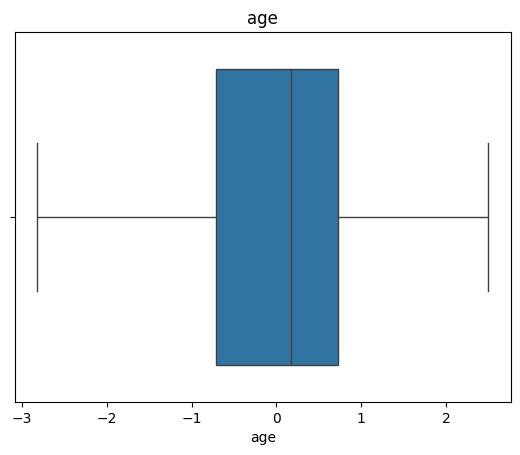

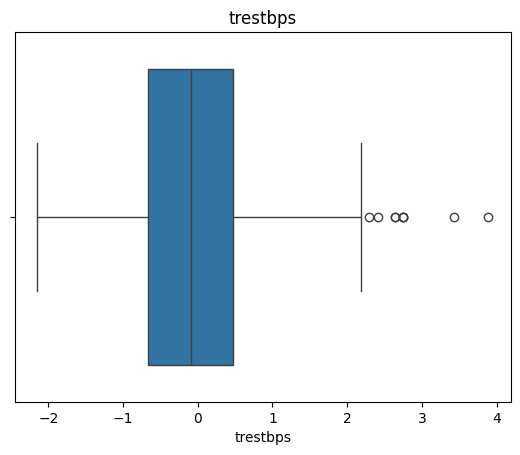

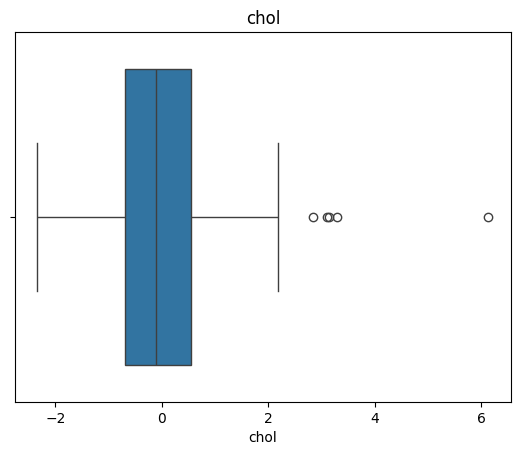

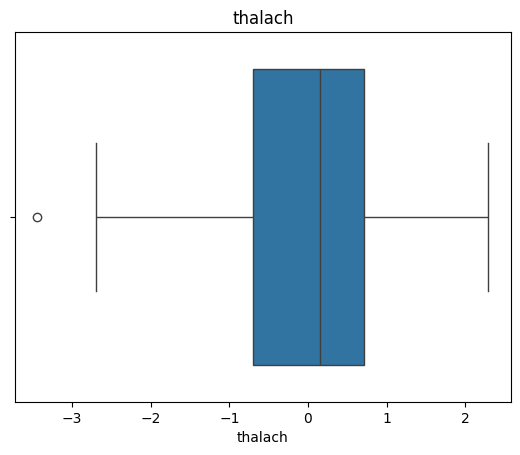

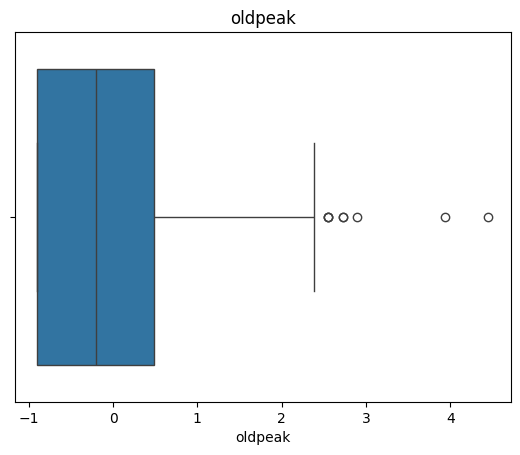

In [131]:
# Poner las variables categorícas como object
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'slope']
df[categoricas] = df[categoricas].astype(object)

# separar las variables numericas
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Muestra el boxplot de cada una de las variables
for col in cols:
    sns.boxplot(x=col, data = df)
    plt.title(col)
    plt.show()

Usamos los boxplots para identificar los outliers de cada una de las variables

## Datos faltantes

Las unicas variables que presentan datos faltantes son ca y thal, como estos representan menos del 5 porciento del total de los datos podemos imputar los datos faltantes

In [132]:
df = df.dropna() 

In [133]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [134]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    print(f'{col}: {df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]} outliers')
    if col == 'oldpeak':
        # trata oldpeak con clip (se trata aca por que se necesitan los limites del boxplot)
        df[col] = df[col].clip(lim_inf, lim_sup)

age: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
thalach: 1 outliers
oldpeak: 8 outliers


/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_96534/558505138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lim_inf, lim_sup)


In [135]:
df['trestbps'] = winsorize(df['trestbps'], limits=[0.05, 0.05])
df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])
df['thalach'] = winsorize(df['thalach'], limits=[0.05, 0.05])
df['ca'] = winsorize(df['thalach'], limits=[0.05, 0.05])

/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_96534/308335225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps'] = winsorize(df['trestbps'], limits=[0.05, 0.05])
/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_96534/308335225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])
/var/folders/pp/g422ndkj1fjg2n3svfwh2l4w0000gn/T/ipykernel_96534/308335225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [136]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    print(f'{col}: {df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]} outliers')

age: 0 outliers
trestbps: 0 outliers
chol: 0 outliers
thalach: 0 outliers
oldpeak: 0 outliers


/Users/sebastiansanchez/.pyenv/versions/3.12.2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/sebastiansanchez/.pyenv/versions/3.12.2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/sebastiansanchez/.pyenv/versions/3.12.2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/sebastiansanchez/.pyenv/versions/3.12.2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/sebastiansanchez/.pyenv/versions/3.12.2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the

# lable encoding

Convierte cada variable categoríca en un booleano, y si una variable tenia mas de una opción crea una nueva variable para cada una de las opciones

In [137]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(cat_cols))

# Aplicar One-Hot Encoding si hay categóricas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Variables categóricas: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


# Escalamiento de variables numéricas

Normalizacion de cada variable cuantitativa

In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame con nombres originales
X = pd.DataFrame(X_scaled, columns=X.columns)

# Confirmar
print(" Preprocesamiento completo. Datos listos para modelar.")

 Preprocesamiento completo. Datos listos para modelar.


## Desbalance de clases

Separamos el dataframe en X y y

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# División original sin balanceo
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo simple para evaluar
modelo_base = LogisticRegression(max_iter=1000)
modelo_base.fit(X_train_orig, y_train_orig)
y_pred_orig = modelo_base.predict(X_test_orig)

# Matriz de confusión
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
print("Matriz de Confusión (Antes del balanceo):")
print(cm_orig)

# Visualización
disp_orig = ConfusionMatrixDisplay(confusion_matrix=cm_orig, display_labels=["Sano (0)", "Con enfermedad (1)"])
disp_orig.plot(cmap="Blues")
plt.title("Antes del balanceo")
plt.show()


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [139]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.718306,0.653650
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.487269,-0.895552
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.418744,1.170051
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.718306,-0.895552
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.718306,-0.895552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.718306,1.170051
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.418744,1.170051
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.350219,1.170051
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.350219,-0.895552
